In [1]:
%matplotlib notebook
from radiospectra.sources import CallistoSpectrogram

<IPython.core.display.Javascript object>


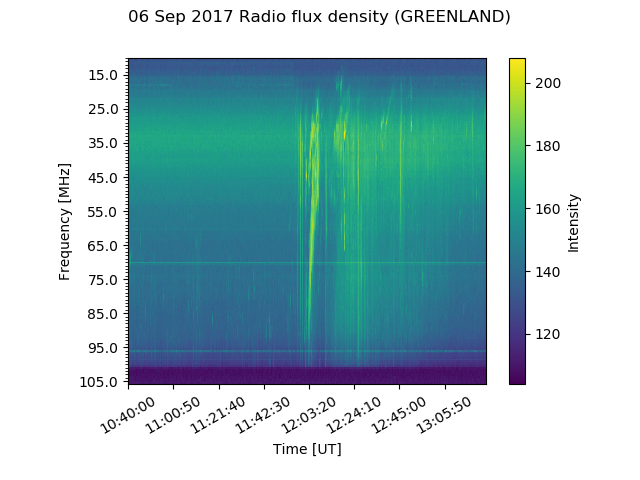

In [2]:
# Load and join a series of spectrograms of the same instrument (frequencies have to be the same to join them)

import os
spectrograms = []

for root, dirs, files in os.walk("example_callisto_files", topdown = False):
    for file in files:
        full_name = os.path.join(root, file)
        spec = CallistoSpectrogram.read(full_name)
        spectrograms.append(spec)
spec_joined = CallistoSpectrogram.join_many(spectrograms, maxgap=None, fill=0)
spec_joined.peek()

<IPython.core.display.Javascript object>


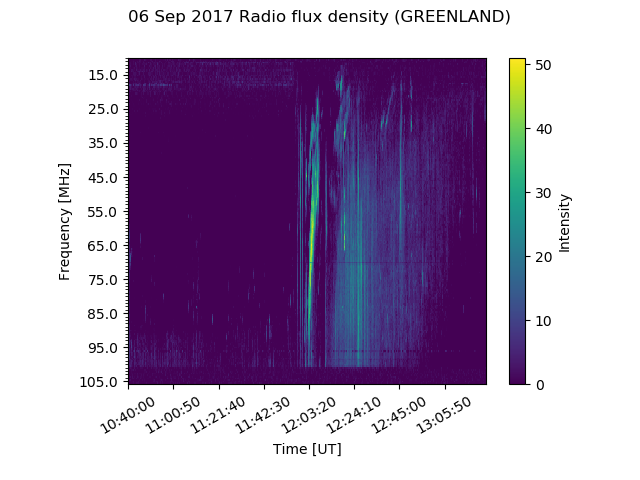

In [3]:
# current implementation of the background subtraction

spec_joined_default_bgs = spec_joined.subtract_bg()
spec_joined_default_bgs.peek(vmin=0)

<IPython.core.display.Javascript object>


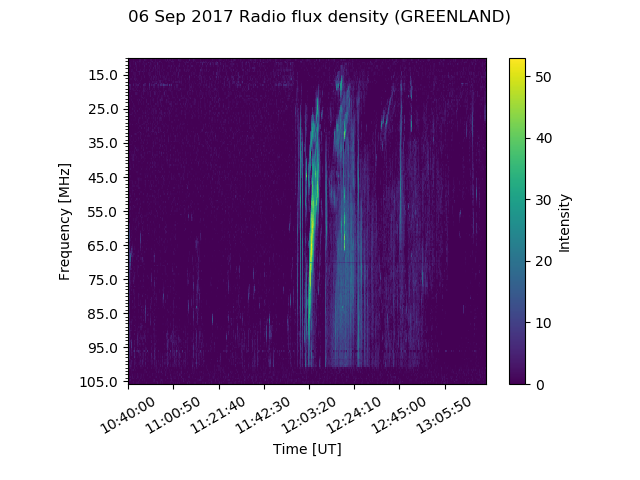

In [4]:
# new implementation of the background subtraction with a sliding window
# Arguments:
#   window_width   - the width of the sliding window that is used to determine the background for the current position
#   affected_width - the width of the "window" for that the current determined background is used
#                    also determines how much the sliding window is moved each itteration
#   amount         - The percent amount (out of 1) of lowest standard deviation to consider.
#                    (this is the same as in the current implementation BUT applied to the sliding window)

# NOTE:
# currently returns three CallistoSpectrogram objects to make it easier to view the results
# 1. The original spectrogram with the background subtracted
# 2. The detected background
# 3. A plot to show which columns were used how many times in the process of detecing the background
# This is used to debug and analyze.
# This is not to stay like this since number three is no Spectrogram
# and the headers of number one and two are not adjusted to the background subtraction
# The final version should only return number one with correct headers
# Number two and three should still be made available since they carry potentially important information


sliding_bgs, sliding_bg_only, sliding_column_freq = spec_joined.subtract_bg_sliding_window(
    window_width=5000, affected_width=1, amount=0.05)
sliding_bgs.peek(vmin=0)

In [5]:
# Save the generated CallistoSpectrogram

from time import gmtime, strftime
file_name_save = str(f'example_callisto_joined/joined_{strftime("%Y_%m_%d_%H_%M_%S", gmtime())}.fit.gz')
sliding_bgs.save(file_name_save)

<IPython.core.display.Javascript object>


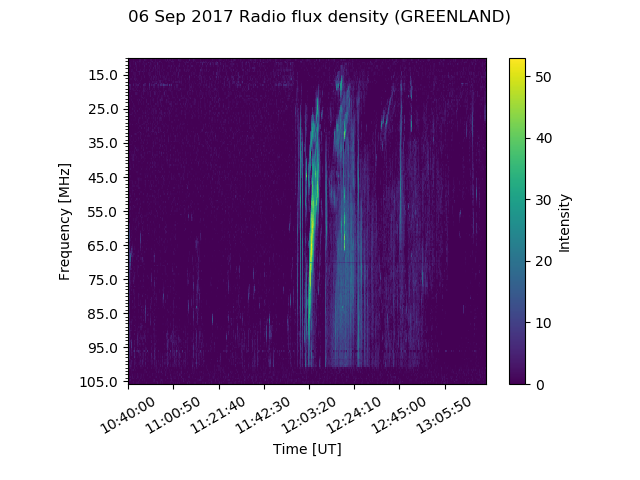

In [6]:
# Load and display the saved CallistoSpectrogram

spec = CallistoSpectrogram.read(file_name_save)
spec.peek(vmin=0)